In [1]:

resulting_response_folder_path = "/Users/sefika/phd_projects/revision/RAG4RE/results/llama2_7b/returned_responses/"

In [3]:
# read and write json
import os
import sys
import json

def read_json(path):
    with open(path, 'r', encoding="utf-8") as f:
        data = json.load(f)
    return data

def write_json(data, path):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

In [4]:
resulting_response_files = []

for file_name in os.listdir(resulting_response_folder_path):
    if not "semeval" in file_name:
        resulting_response_files.append(file_name)

In [5]:
## Wrong prefix Examples!
stats_per_files = []

for i in range(0, 6):    

    resulting_data = read_json(resulting_response_folder_path+'/'+resulting_response_files[i])
    # print( list(resulting_data[0].values()))
    # print(resulting_data[0])
    if type(resulting_data[0]) == dict:
        unique_predictions = [ item for item in list(resulting_data[0].values())]
        # print(unique_predictions)
    else:
        unique_predictions = resulting_data
    # print(type(unique_predictions))
    stats = {"file_name":resulting_response_files[i], "unique_prediction": list(set(unique_predictions))}
    stats_per_files.append(stats)
    


In [9]:
# not in relation types given in the prompt template:
def print_hallucinated_relation_types(predictions, ground_truths):
    count=0
    no_prefix=0
    for i, pred in enumerate(predictions):
        if ":" in pred:
            # print(f"include : ---->{pred}")
            relation = pred.split(":")[1]
            prefix = pred.split(":")[0]
            # print(f"prefix : ---->{prefix}")
            pred = relation
            if prefix == "":
                no_prefix +=1
        
           
        if not pred in ground_truths:
            # print(pred)
            count +=1
        # else:
        #     print(f"founded relation:-----> {pred}")
    return count, no_prefix

ground_truths_relation_types = list(set(read_json("/Users/sefika/phd_projects/revision/RAG4RE/data/tacred/test-relations.json")))
#remove semicolumns
ground_truths_relation_types = [relation.split(":")[1] if ":" in relation else relation for relation in ground_truths_relation_types]



In [11]:
llama_7b_stats = []
for i in range(len(stats_per_files)):
    # print(stats_per_files[i])
    
    count, no_prefix = print_hallucinated_relation_types(stats_per_files[i]['unique_prediction'], ground_truths_relation_types)
    stat = {"file name": stats_per_files[i]['file_name'], "# of non defined relations": count, " # of no prefix": no_prefix}
    llama_7b_stats.append(stat)
    

    

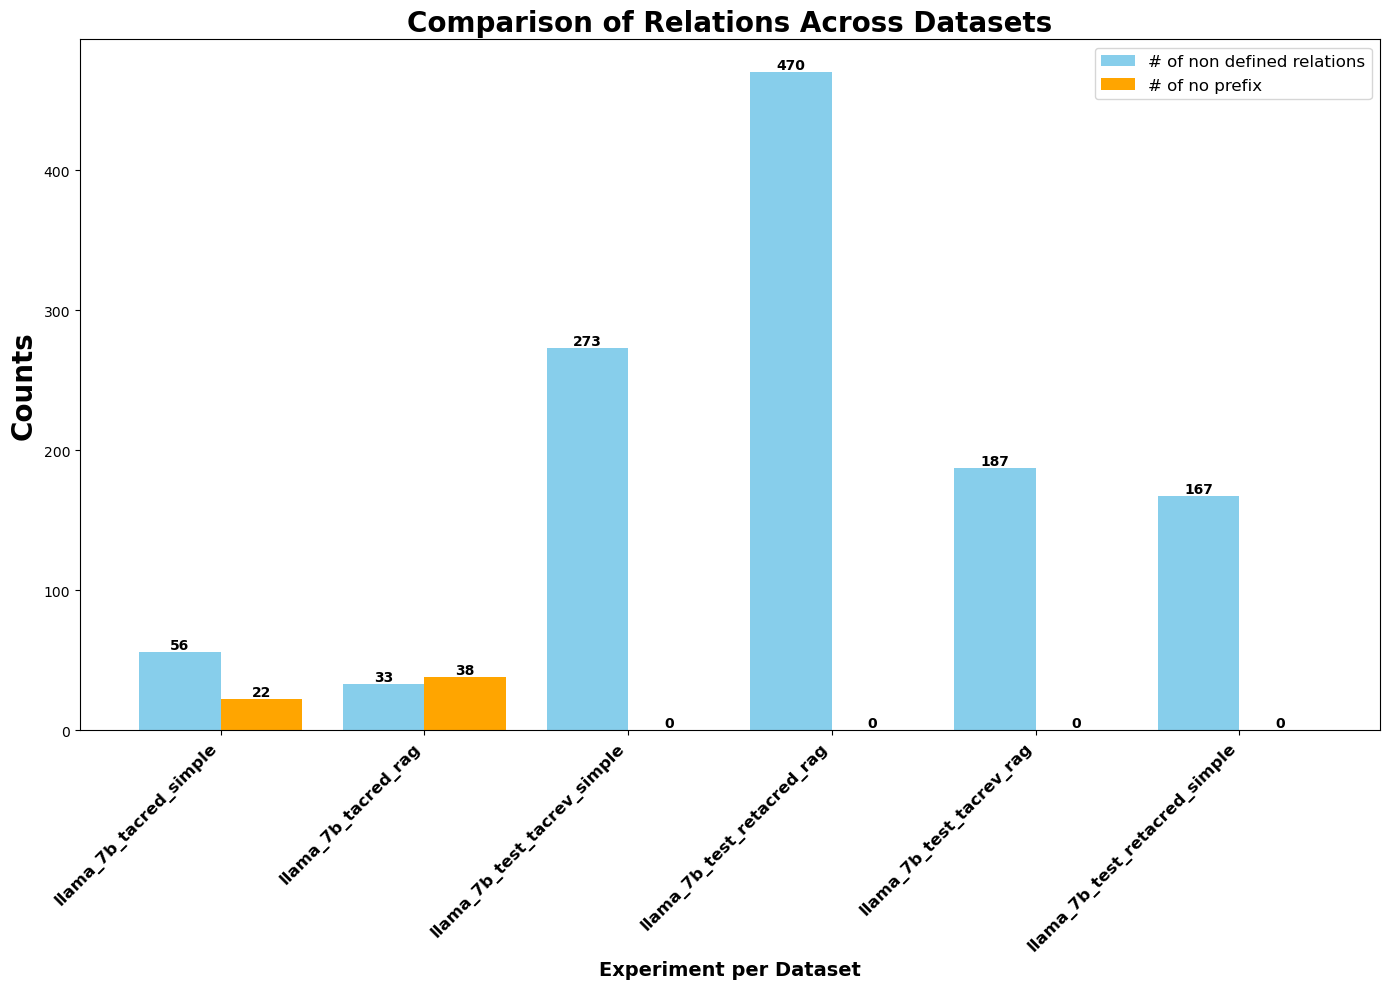

In [13]:
import matplotlib.pyplot as plt

# Data
data = [
    {'file name': 'llama_7b_tacred_simple', '# of non defined relations': 56, ' # of no prefix': 22},
    {'file name': 'llama_7b_tacred_rag', '# of non defined relations': 33, ' # of no prefix': 38},
    {'file name': 'llama_7b_test_tacrev_simple', '# of non defined relations': 273, ' # of no prefix': 0},
    {'file name': 'llama_7b_test_retacred_rag', '# of non defined relations': 470, ' # of no prefix': 0},
    {'file name': 'llama_7b_test_tacrev_rag', '# of non defined relations': 187, ' # of no prefix': 0},
    {'file name': 'llama_7b_test_retacred_simple', '# of non defined relations': 167, ' # of no prefix': 0},
]

# Extracting values
file_names = [entry['file name'] for entry in data]
non_defined_relations = [entry['# of non defined relations'] for entry in data]
no_prefix = [entry[' # of no prefix'] for entry in data]

# Plotting
x = range(len(file_names))  # X-axis positions

plt.figure(figsize=(14, 10))
bar_width = 0.4

# Bars
bars1 = plt.bar(x, non_defined_relations, width=bar_width, label='# of non defined relations', color='skyblue')
bars2 = plt.bar([pos + bar_width for pos in x], no_prefix, width=bar_width, label='# of no prefix', color='orange')

# Adding count values to the top of bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title with bold and increased font size
plt.xlabel('Experiment per Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=20, fontweight='bold')
plt.title('Comparison of Relations Across Datasets', fontsize=20, fontweight='bold')
plt.xticks([pos + bar_width / 2 for pos in x], file_names, rotation=45, ha='right', fontsize=12, fontweight='bold')

# Legend
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
